In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import shapiro


## Latar Belakang Masalah
Dalam industri AWS, memahami kontribusi segmen pasar yang berbeda sangat penting untuk mengoptimalkan strategi penjualan. Data SaaS-Sales mencakup berbagai segmen pelanggan, termasuk SMB, Enterprise dan Strategic, yang berkontribusi terhadap penjualan dan profitabilitas perusahaan. Analisis segmentasi pasar akan membantu mengidentifikasi segmen pelanggan yang paling menguntungkan dan memberikan wawasan untuk pengambilan keputusan yang lebih efektif.

## Identifikasi Masalah
Ketidakjelasan mengenai segmen pasar mana yang memberikan kontribusi terbesar terhadap penjualan dan profitabilitas perusahaan. Kurangnya pemahaman ini dapat mengakibatkan alokasi sumber daya yang tidak optimal dan strategi pemasaran yang kurang efektif. Oleh karena itu, diperlukan analisis mendalam untuk mengidentifikasi segmen pelanggan yang paling menguntungkan dan menentukan area yang memerlukan perhatian lebih dalam strategi penjualan.

## Rumusan Masalah
1. Segmen pasar mana yang memberikan kontribusi terbesar terhadap penjualan dan profitabilitas perusahaan AWS?
2. Bagaimana perbedaan kinerja antara segmen SMB, Enterprise dan Strategic dalam hal penjualan dan profitabilitas?

## Tujuan Analisis
1. Mengidentifikasi segmen pasar yang memberikan kontribusi terbesar terhadap penjualan dan profitabilitas perusahaan AWS.
2. Membandingkan kinerja antara segmen SMB, Enterprise dan Strategic dalam hal penjualan dan profitabilitas.
3. Memberikan rekomendasi untuk mengarahkan strategi penjualan dan pemasaran yang lebih efektif.

## Metode Analisis
1. Data Cleaning
2. Data Visualization
3. Uji Statistik
4. Uji Hipotesis


## Data
Untuk menjawab permasalahan di atas, kita akan menganalisis data SaaS-Sales.csv yang sudah dikumpulkan perusahaan.

In [49]:
sales_data = pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'], index_col='Row ID')
sales_data.head(20)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
7,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
9,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825


## Dataset Info
 1. Row ID: A unique identifier for each transaction.
 2. Order ID: A unique identifier for each order.
 3. Order Date: The date when the order was placed.
 4. Date Key: A numerical representation of the order date (YYYYMMDD).
 5. Contact Name: The name of the person who placed the order.
 6. Country: The country where the order was placed.
 7. City: The city where the order was placed.
 8. Region: The region where the order was placed.
 9. Subregion: The subregion where the order was placed.
 10. Customer: The name of the company that placed the order.
 11. Customer ID: A unique identifier for each customer.
 12. Industry: The industry the customer belongs to.
 13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
 14. Product: The product was ordered.
 15. License: The license key for the product.
 16. Sales: The total sales amount for the transaction.
 17. Quantity: The total number of items in the transaction.
 18. Discount: The discount applied to the transaction.
 19. Profit: The profit from the transaction

In [50]:
display(sales_data.info(), sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Date Key      9994 non-null   int64         
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64        

None

,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


## Null check
Sebelum kita dapat menganalisis data, kita perlu menghandle data-data null. Oleh karena itu, kita akan melakukan pengecekan terlebih dahulu apakah ada data null atau tidak

In [51]:
sales_data.isna().sum()

Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Sales and Profit data distribution
Kita perlu melihat data untuk profit dan sales apakah terdistribusi normal dan apakah ada outliers atau tidak

In [52]:
display(sales_data[['Profit','Sales']].describe())

,Profit,Sales
count,9994.000000,9994.000000
mean,28.656896,229.858001
std,234.260108,623.245101
min,-6599.978000,0.444000
25%,1.728750,17.280000
50%,8.666500,54.490000
75%,29.364000,209.940000
max,8399.976000,22638.480000


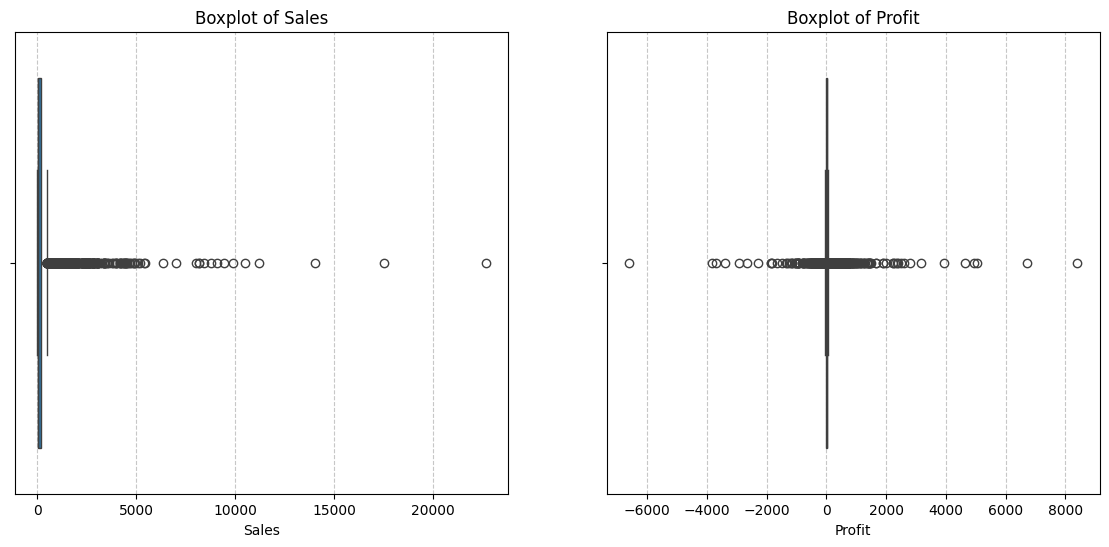

In [53]:
# Plotting boxplots for Sales and Profit to detect outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=sales_data['Sales'])
plt.title('Boxplot of Sales')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.boxplot(x=sales_data['Profit'])
plt.title('Boxplot of Profit')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


Bisa kita lihat bahwa kedua profit dan sales mempunyai banyak outlier

## Normality test and removing outliers
Kita akan menguji kenormalitas distribusi profit dan sales, beserta menghilangkan outliers dari data

c:\Users\Robert\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7874.



Shapiro-Wilk Test for Sales: W=0.7179582394113686, p-value=1.644207530545749e-78
Shapiro-Wilk Test for Profit: W=0.9287356116619178, p-value=1.4122559998574526e-51


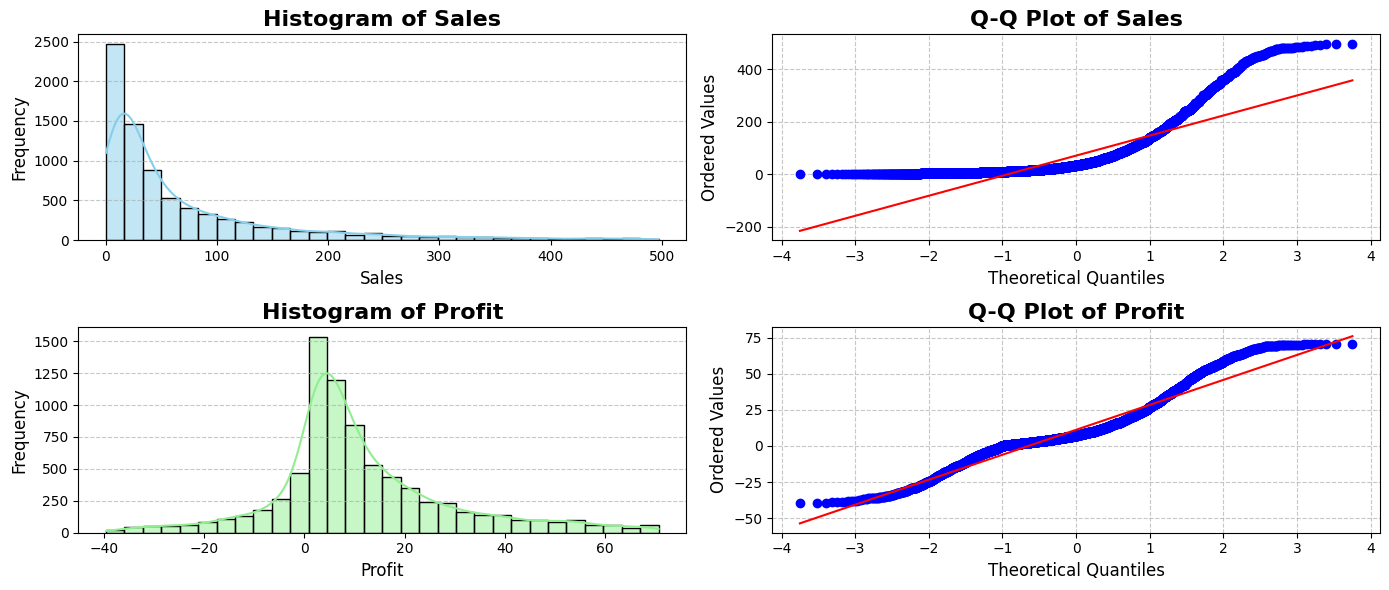

In [54]:
# Hitung IQR
Q1_sales = sales_data['Sales'].quantile(0.25)
Q3_sales = sales_data['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

Q1_profit = sales_data['Profit'].quantile(0.25)
Q3_profit = sales_data['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Definisikan batas bawah dan batas atas
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Hilangkan outlier
sales_data_cleaned = sales_data[
    (sales_data['Sales'] >= lower_bound_sales) & (sales_data['Sales'] <= upper_bound_sales) & (sales_data['Profit'] >= lower_bound_profit) & (sales_data['Profit'] <= upper_bound_profit)
]

## sales_data_cleaned.to_csv('SaaS-Sales Cleaned.csv', index=False)

# Uji normalitas
shapiro_sales = shapiro(sales_data_cleaned['Sales'])
print(f"Shapiro-Wilk Test for Sales: W={shapiro_sales.statistic}, p-value={shapiro_sales.pvalue}")

shapiro_profit = shapiro(sales_data_cleaned['Profit'])
print(f"Shapiro-Wilk Test for Profit: W={shapiro_profit.statistic}, p-value={shapiro_profit.pvalue}")

# Visualisasi data setelah outlier hilang
plt.figure(figsize=(14, 6))

# Histogram dan Q-Q Plot untuk Sales
plt.subplot(2, 2, 1)
sns.histplot(sales_data_cleaned['Sales'], kde=True, color='skyblue', bins=30)
plt.title('Histogram of Sales', fontsize=16, weight='bold')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
stats.probplot(sales_data_cleaned['Sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales', fontsize=16, weight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Ordered Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Histogram and Q-Q Plot for Profit
plt.subplot(2, 2, 3)
sns.histplot(sales_data_cleaned['Profit'], kde=True, color='lightgreen', bins=30)
plt.title('Histogram of Profit', fontsize=16, weight='bold')
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 4)
stats.probplot(sales_data_cleaned['Profit'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Profit', fontsize=16, weight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Ordered Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Monthly Sum Profit, Sum Sales and Profit Margin
Untuk melihat keuntungan company overtime, kita lihat lewat Profit Margin

C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\915251907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\915251907.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



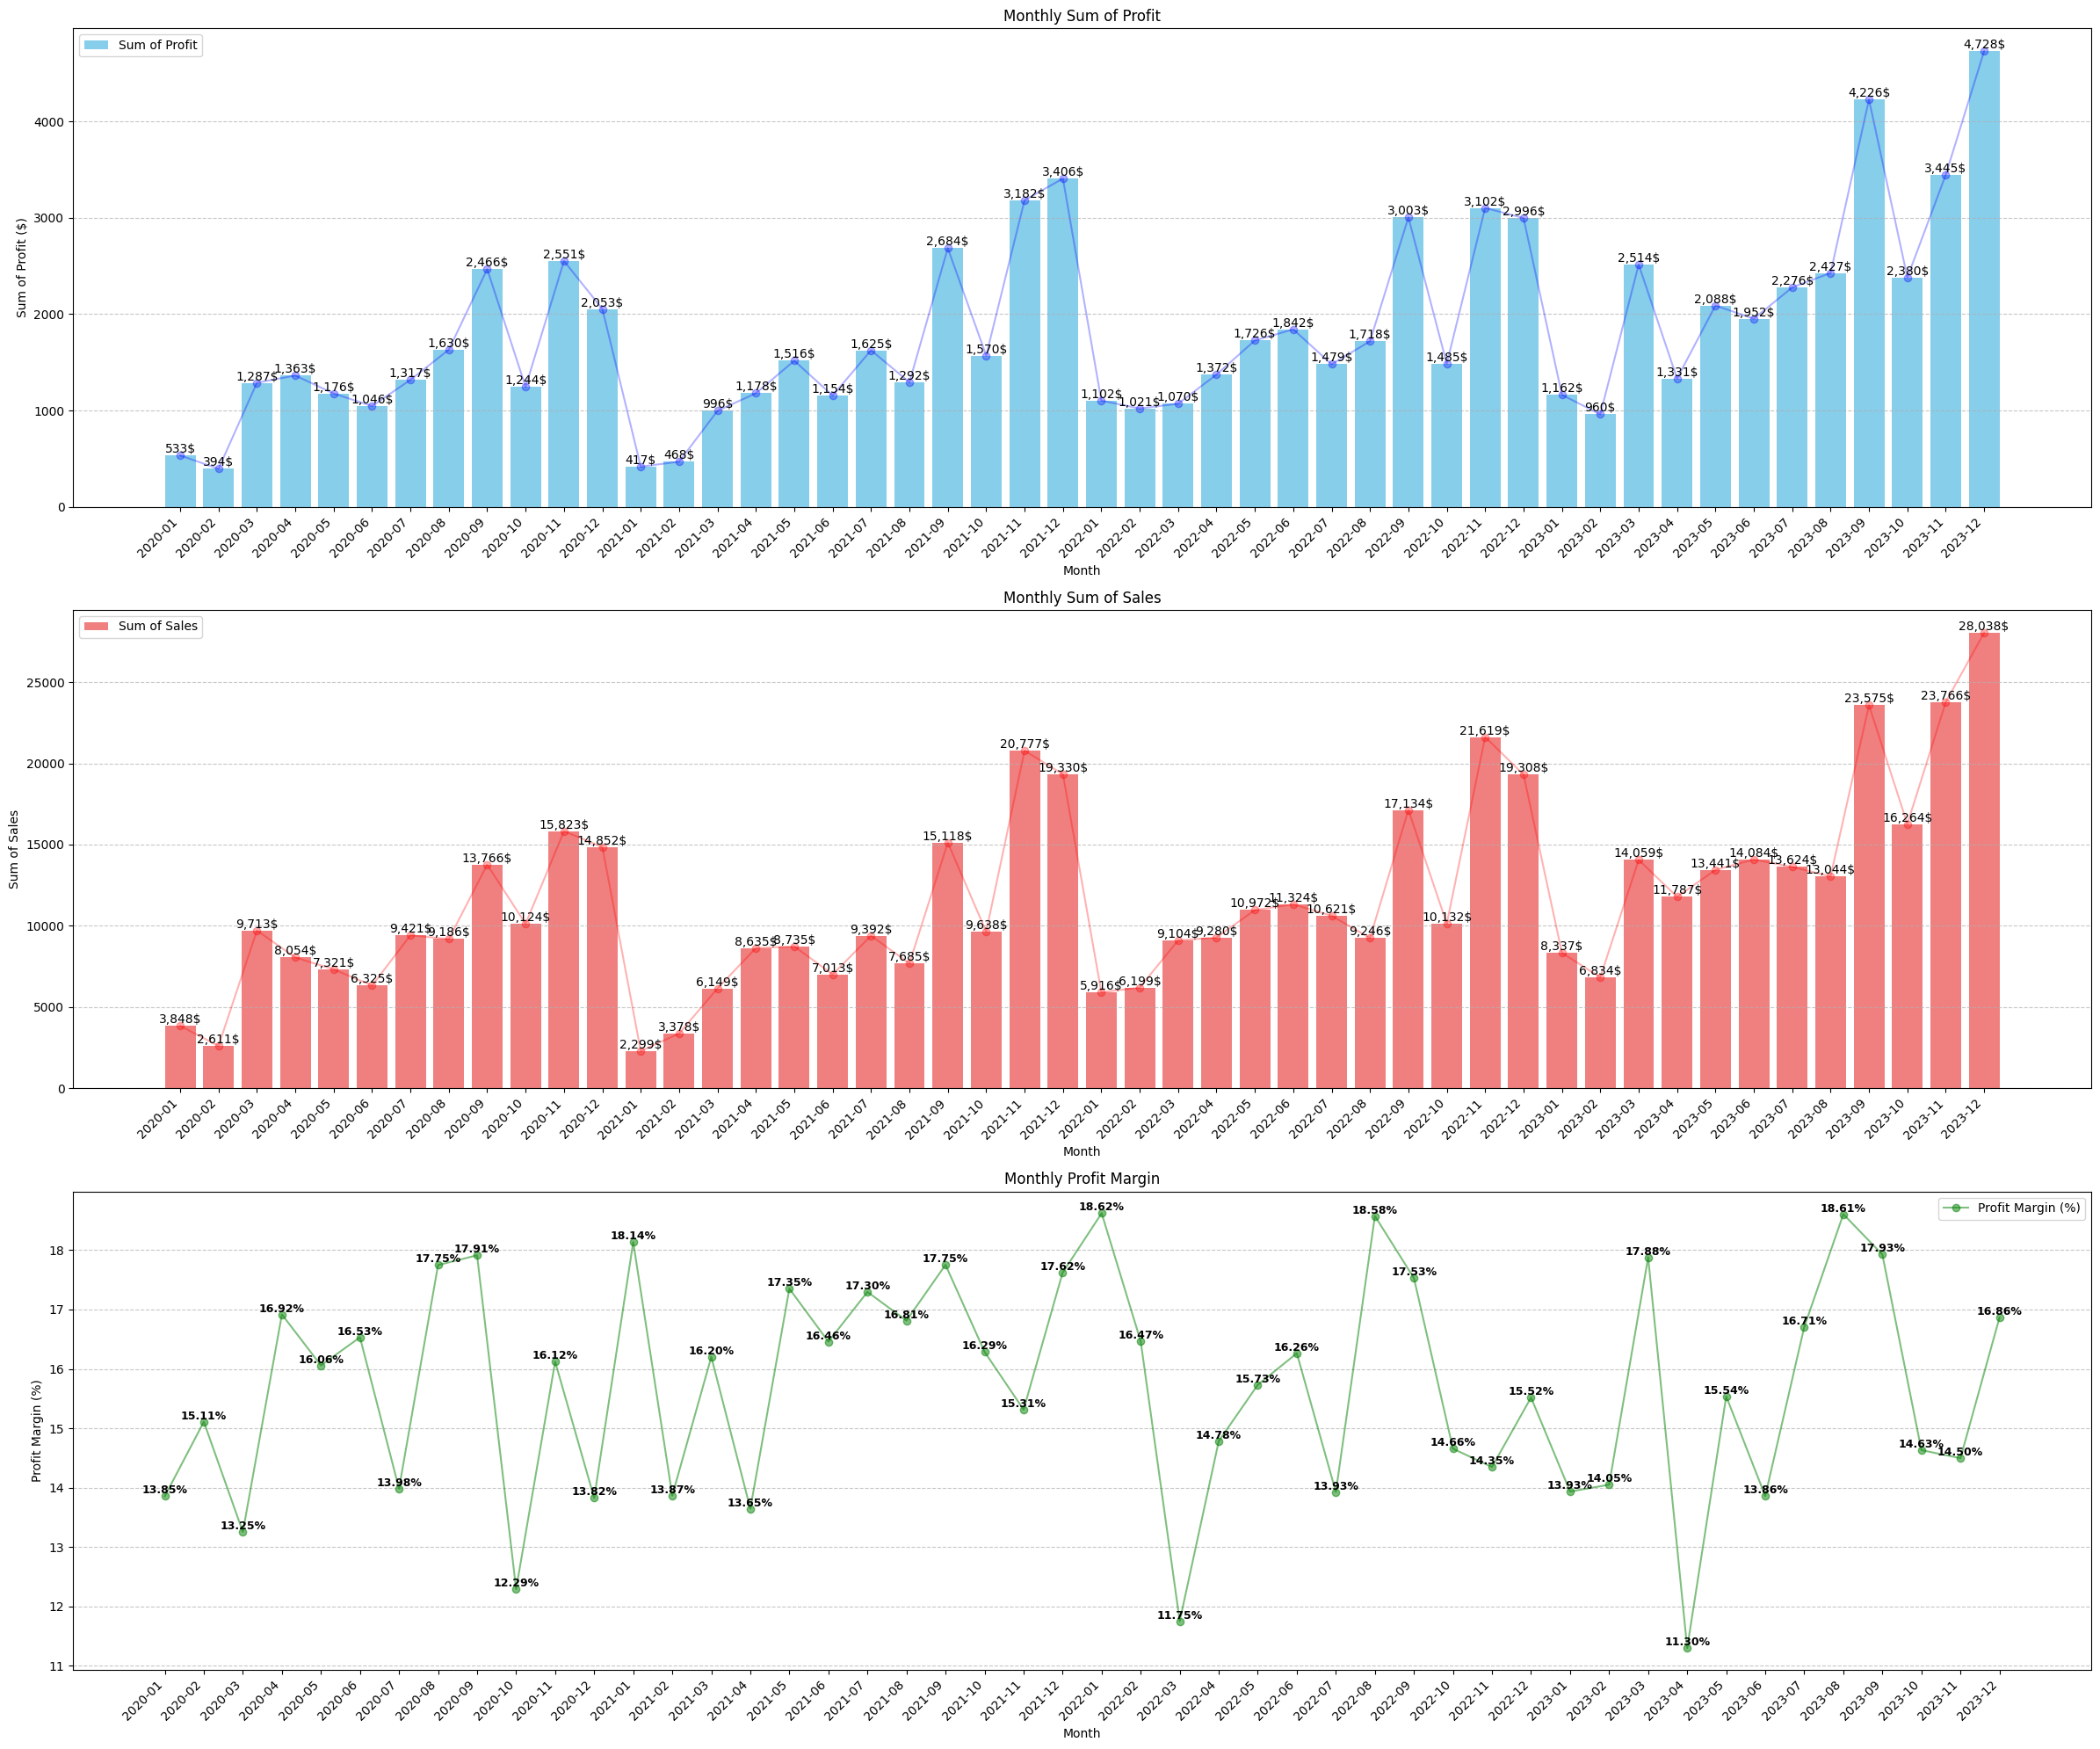

In [55]:

sales_data_cleaned['Order Date'] = pd.to_datetime(sales_data_cleaned['Order Date'])

# Ambil bulan dan tahun dari 'Order Date'
sales_data_cleaned['YearMonth'] = sales_data_cleaned['Order Date'].dt.to_period('M')

# Gabungkan data berdasarkan bulan  dan hitung rata-rata dan total profit sama sales
monthly_profit = sales_data_cleaned.groupby('YearMonth')['Profit'].agg(['sum', 'mean']).reset_index()

monthly_profit_sorted = monthly_profit.sort_values(by='YearMonth')

monthly_data = sales_data_cleaned.groupby('YearMonth').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

# Profit Margin
monthly_data['Profit Margin (%)'] = (monthly_data['Profit'] / monthly_data['Sales']) * 100

monthly_data_sorted = monthly_data.sort_values(by='YearMonth')

plt.figure(figsize=(24, 20))

# Barplot for sum of profits
plt.subplot(3, 1, 1)
bars = plt.bar(monthly_profit_sorted['YearMonth'].astype(str), monthly_profit_sorted['sum'], color='skyblue', label='Sum of Profit')
plt.plot(monthly_profit_sorted['YearMonth'].astype(str), monthly_profit_sorted['sum'], color='blue', marker='o', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sum of Profit ($)')
plt.title('Monthly Sum of Profit')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.7, linestyle='--')

# Labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}$', ha='center', va='bottom', fontsize=10)

# Barplot for sum of sales
plt.subplot(3, 1, 2)
bars = plt.bar(monthly_data_sorted['YearMonth'].astype(str), monthly_data_sorted['Sales'], color='lightcoral', label='Sum of Sales')
plt.plot(monthly_data_sorted['YearMonth'].astype(str), monthly_data_sorted['Sales'], color='red', marker='o', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sum of Sales')
plt.title('Monthly Sum of Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.7, linestyle='--')

# Labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}$', ha='center', va='bottom', fontsize=10)

# Linechart for profit margin
plt.subplot(3, 1, 3)
plt.plot(monthly_data_sorted['YearMonth'].astype(str), monthly_data_sorted['Profit Margin (%)'], color='green', marker='o', linestyle='-', label='Profit Margin (%)', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Profit Margin (%)')
plt.title('Monthly Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.7, linestyle='--')

# Adding labels on the line plot for profit margin
for i in range(len(monthly_data_sorted)):
    plt.text(monthly_data_sorted['YearMonth'].astype(str).iloc[i], 
             monthly_data_sorted['Profit Margin (%)'].iloc[i], 
             f'{monthly_data_sorted["Profit Margin (%)"].iloc[i]:.2f}%', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


## Total Profit and Sales Details By Segment

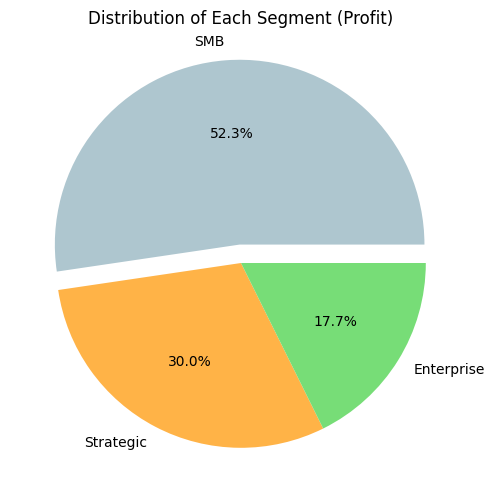

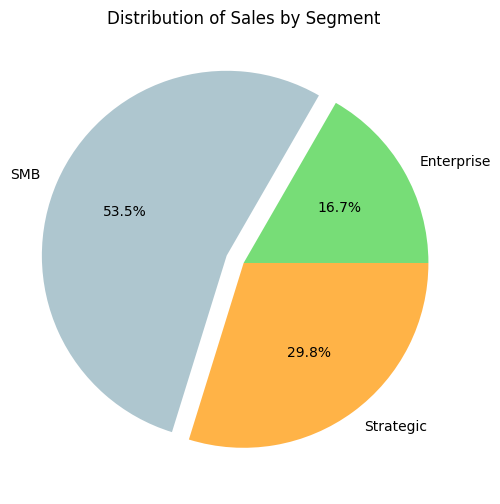

In [75]:
segment_colors = {
    'SMB': '#AEC6CF',        # Pastel blue
    'Enterprise': '#77DD77', # Pastel green
    'Strategic': '#FFB347'   # Pastel orange
}

# Count each segment
segment_counts = sales_data_cleaned['Segment'].value_counts()
segments = segment_counts.index

# Create a list of colors based on the segment order
colors_for_count = [segment_colors[segment] for segment in segments]

# Pie Chart for Segment Count (Profit)
plt.figure(figsize=(10, 6))

plt.pie(
    segment_counts, 
    labels=segments, 
    autopct='%1.1f%%', 
    colors=colors_for_count, 
    explode=(0.1, 0, 0)  # Explode first segment (SMB)
)

plt.title('Distribution of Each Segment (Profit)')
plt.show()

# Calculate the total sales for each segment
sales_by_segment = sales_data_cleaned.groupby('Segment')['Sales'].sum()
segments = sales_by_segment.index

# Create a list of colors based on the segment order
colors_for_sales = [segment_colors[segment] for segment in segments]

# Pie Chart for Sales
plt.figure(figsize=(10, 6))

plt.pie(
    sales_by_segment, 
    labels=segments, 
    autopct='%1.1f%%', 
    colors=colors_for_sales, 
    explode=(0, 0.1, 0)  # Explode second segment (Enterprise)
)

plt.title('Distribution of Sales by Segment')
plt.show()

## Monthly Profit Margin by Each Segment
Kita akan sekarang melihat bagian segment mana yang paling menguntungkan untuk AWS dari profit margin

C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\839968680.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



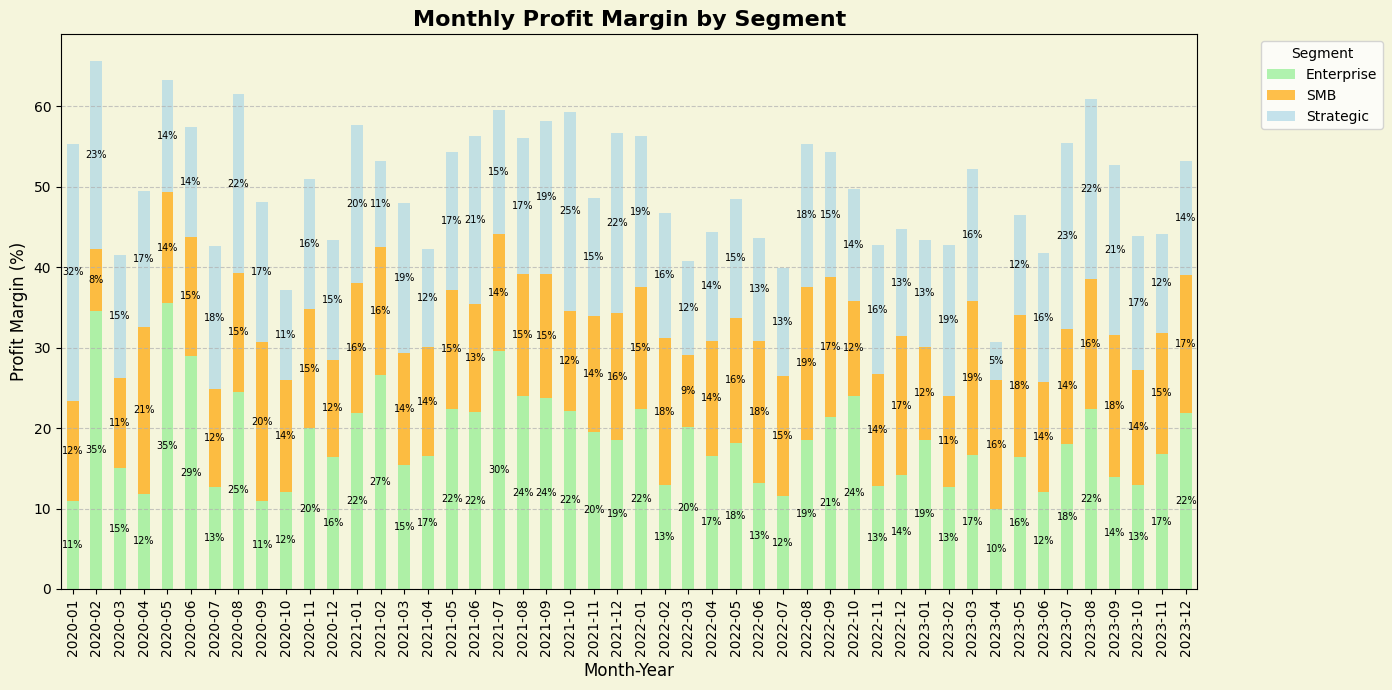

C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\839968680.py:65: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



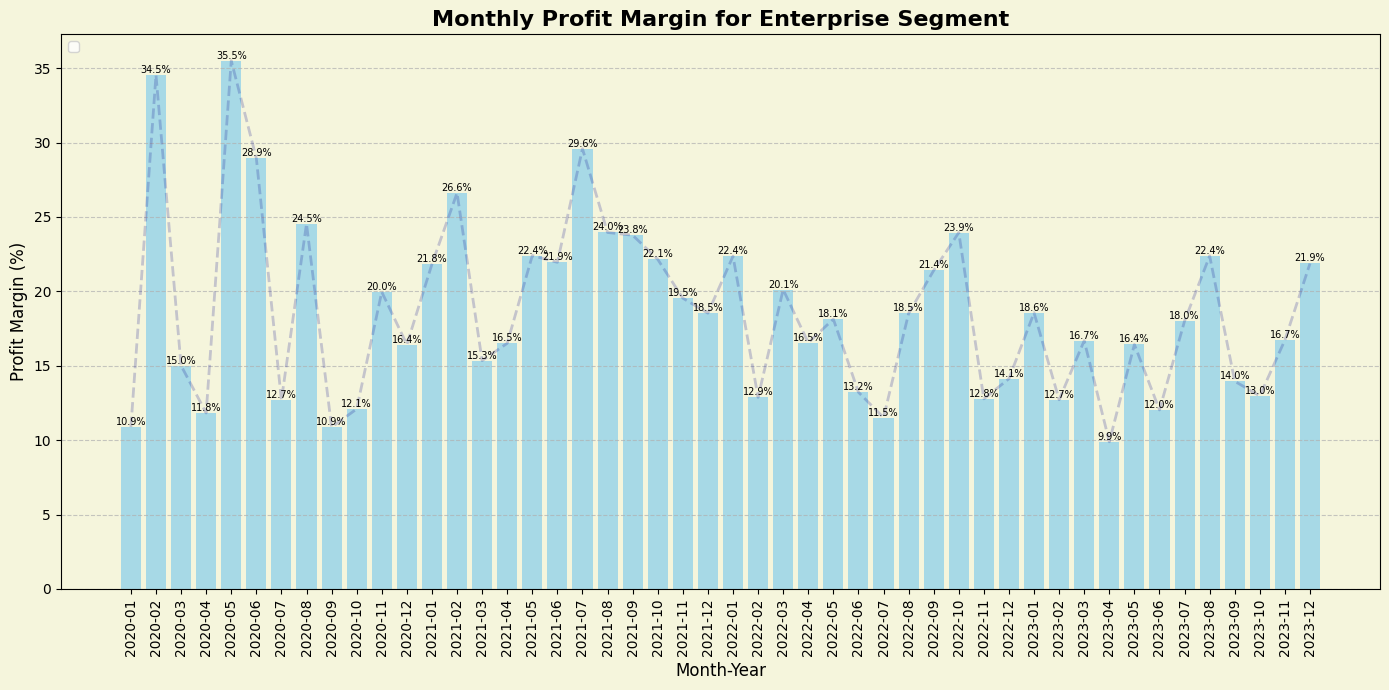

C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\839968680.py:65: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



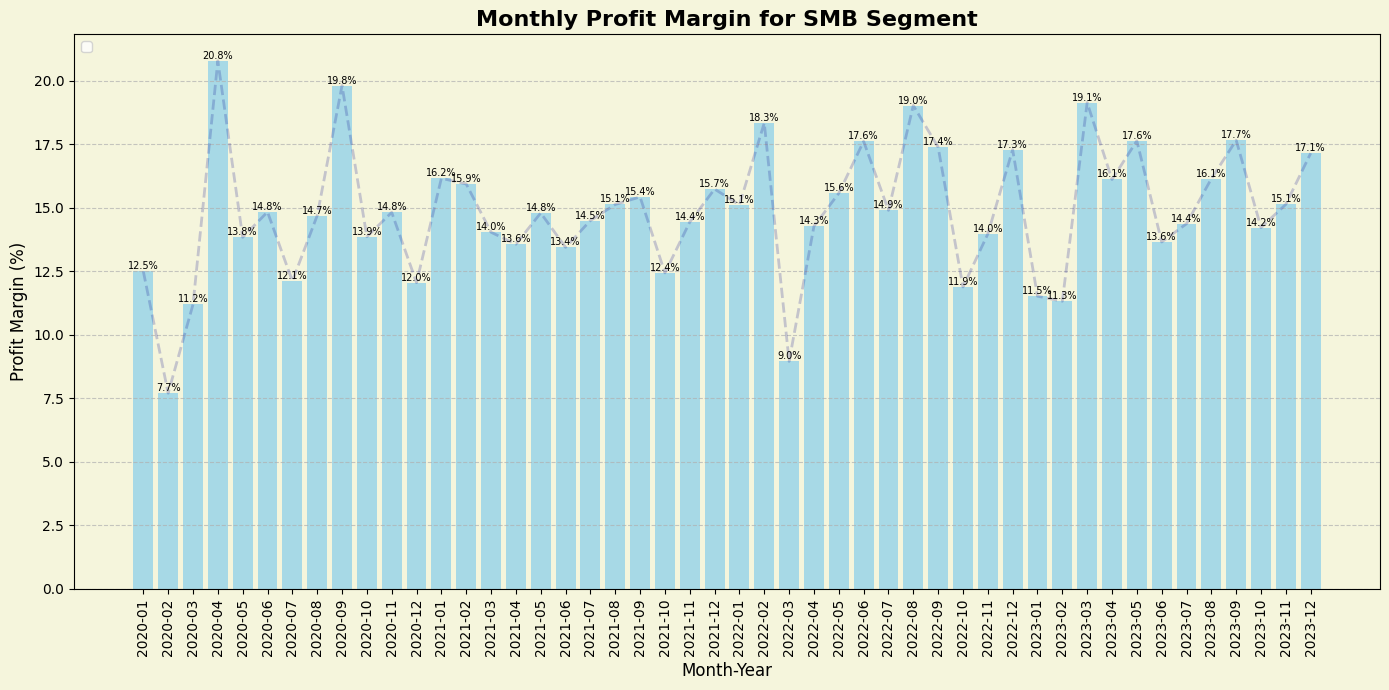

C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\839968680.py:65: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



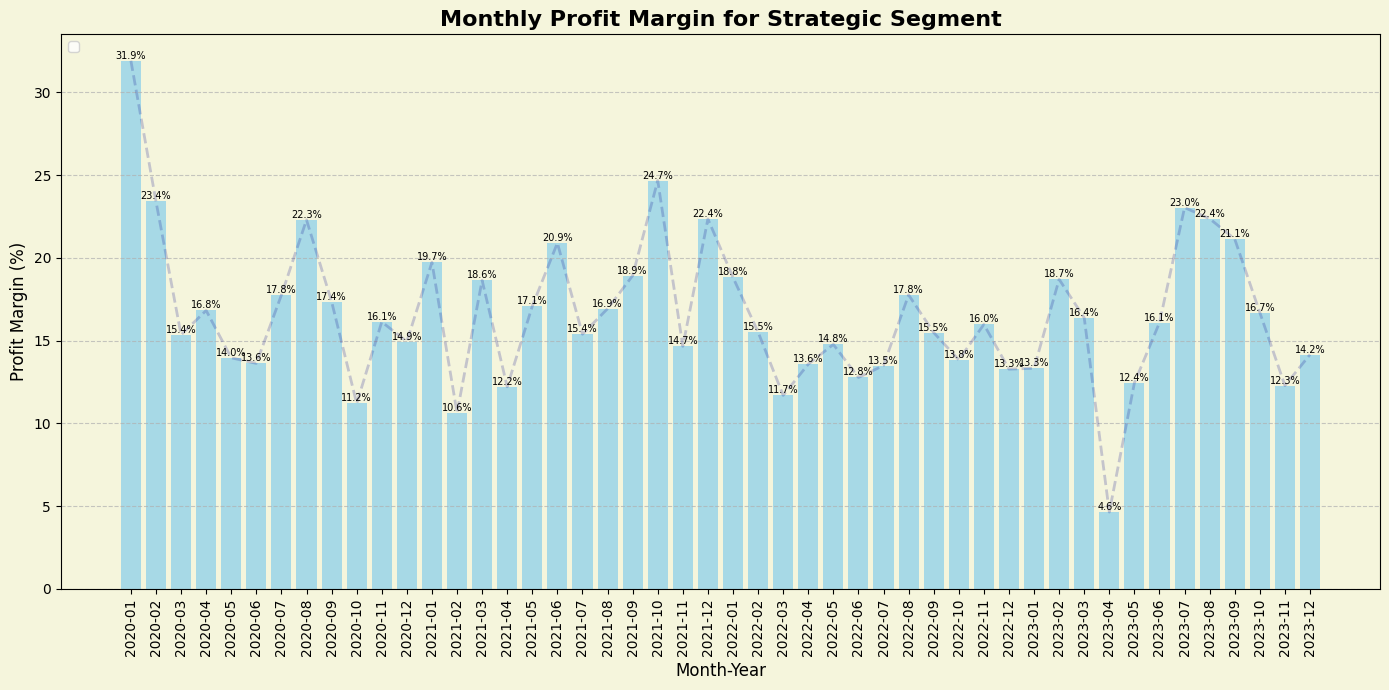

In [78]:
sales_data_cleaned['Year-Month'] = sales_data_cleaned['Order Date'].dt.to_period('M')

grouped_df = sales_data_cleaned.groupby(['Year-Month', 'Segment']).agg(
    {'Profit': 'sum', 'Sales': 'sum'}).reset_index()

# Profit Margin
grouped_df['Profit Margin'] = (grouped_df['Profit'] / grouped_df['Sales']) * 100

# Pivot untuk stacked barplot
pivot_df = grouped_df.pivot(index='Year-Month', columns='Segment', values='Profit Margin')

colors = ['lightgreen', 'orange', 'lightblue']

# Stacked barplot
fig, ax = plt.subplots(figsize=(14, 7))
pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors, alpha=0.7)

# Labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=7)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

ax.set_facecolor('beige')
fig.patch.set_facecolor('beige')

plt.title('Monthly Profit Margin by Segment', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

segments = ['Enterprise', 'SMB', 'Strategic']

for segment in segments:
    # Filter the data for the current segment
    segment_df = grouped_df[grouped_df['Segment'] == segment]
    
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 7))
    bars = ax.bar(segment_df['Year-Month'].astype(str), segment_df['Profit Margin'], alpha=0.7, color='skyblue')

    # Add a line plot over the bars
    ax.plot(segment_df['Year-Month'].astype(str), segment_df['Profit Margin'], 
            color='darkblue', linestyle='--', linewidth=2, markersize=6, alpha=0.2)
    # Add labels to each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', 
                 ha='center', va='bottom', fontsize=7)
    
    ax.set_facecolor('beige')
    fig.patch.set_facecolor('beige')

    plt.title(f'Monthly Profit Margin for {segment} Segment', fontsize=16, weight='bold')
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Profit Margin (%)', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

## Average Profit Margin By Segment

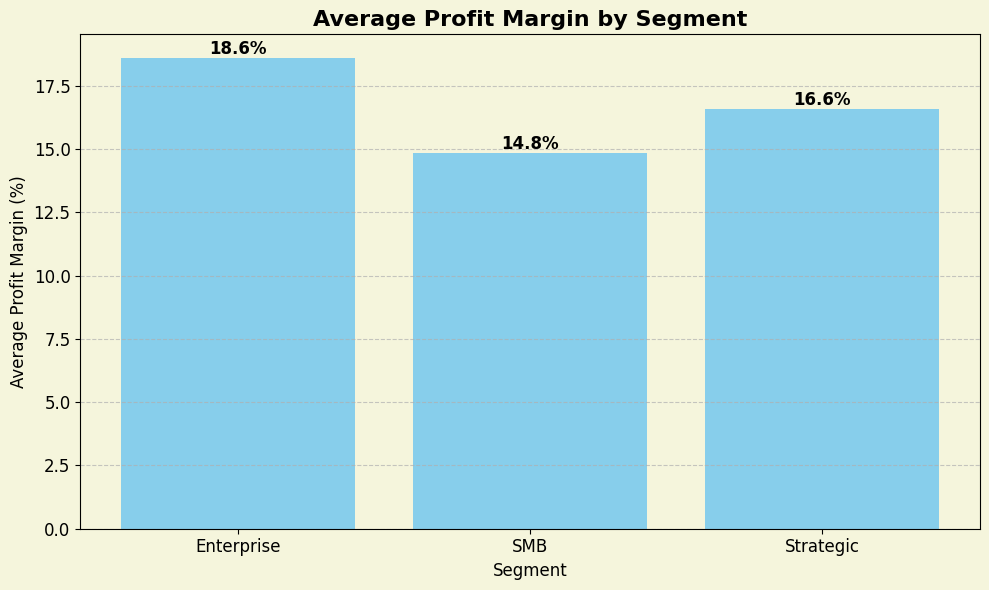

In [59]:
average_profit_margin = grouped_df.groupby('Segment')['Profit Margin'].mean().reset_index()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(average_profit_margin['Segment'], average_profit_margin['Profit Margin'], color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', 
            ha='center', va='bottom', fontsize=12, weight='bold')

# Customize the chart
ax.set_facecolor('beige')
fig.patch.set_facecolor('beige')
plt.title('Average Profit Margin by Segment', fontsize=16, weight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Uji Hipotesis
#### 1. Segmen pasar mana yang memberikan kontribusi terbesar terhadap penjualan dan profitabilitas perusahaan SaaS?
Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam kontribusi profitabilitas (profit margin) antara segmen pasar (SMB, Enterprise, Strategic).

Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam kontribusi profitabilitas (profit margin) antara segmen pasar (SMB, Enterprise, Strategic).

#### 2. Bagaimana perbedaan kinerja antara segmen SMB, Enterprise dan Strategic dalam hal penjualan dan profitabilitas?
Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam kinerja (penjualan dan profit margin) antara segmen SMB, Enterprise, dan Strategic.

Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam kinerja (penjualan dan profit margin) antara segmen SMB, Enterprise, dan Strategic.

In [63]:
# Calculate the Profit Margin and save it to a new column 'Profit Margin'
sales_data_cleaned['Profit Margin'] = (sales_data_cleaned['Profit'] / sales_data_cleaned['Sales']) * 100
segments = sales_data_cleaned['Segment'].unique()
segment_profit_margin = [sales_data_cleaned['Profit Margin'][sales_data_cleaned['Segment'] == segment] for segment in segments]
segment_sales = [sales_data_cleaned['Sales'][sales_data_cleaned['Segment'] == segment] for segment in segments]

# Kruskal Wallis untuk profit margin
kruskal_margin_result_statistic, kruskal_margin_result_pvalue = stats.kruskal(*segment_profit_margin)

# Kruskal Wallis untuk sales
kruskal_sales_result_statistic, kruskal_sales_result_pvalue = stats.kruskal(*segment_sales)

print(f"Nilai P Value = {kruskal_margin_result_pvalue}, yang lebih kecil dari alpha (0.05), \nmenunjukkan bahwa ada perbedaan signifikan dalam kontribusi profitabilitas (profit margin) antara segmen pasar (SMB, Enterprise, Strategic). \nOleh karena itu, kita menolak Hipotesis Nol (H0) dan menerima Hipotesis Alternatif (H1).\n"), 
print(f"Nilai P Value = {kruskal_sales_result_pvalue}, yang lebih besar dari alpha (0.05), \nmenunjukkan tidak ada perbedaan signifikan dalam penjualan antara segmen pasar. \nJadi, kita tidak dapat menolak Hipotesis Nol (H0) untuk kinerja penjualan.")

Nilai P Value = 0.04142892721916367, yang lebih kecil dari alpha (0.05), 
menunjukkan bahwa ada perbedaan signifikan dalam kontribusi profitabilitas (profit margin) antara segmen pasar (SMB, Enterprise, Strategic). 
Oleh karena itu, kita menolak Hipotesis Nol (H0) dan menerima Hipotesis Alternatif (H1).

Nilai P Value = 0.303447245519924, yang lebih besar dari alpha (0.05), 
menunjukkan tidak ada perbedaan signifikan dalam penjualan antara segmen pasar. 
Jadi, kita tidak dapat menolak Hipotesis Nol (H0) untuk kinerja penjualan.


C:\Users\Robert\AppData\Local\Temp\ipykernel_24640\618223693.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Conclusion
### 1. Mengidentifikasi segmen pasar yang memberikan kontribusi terbesar terhadap penjualan dan profitabilitas perusahaan AWS.
Seperti yang bisa kita lihat berdasarkan average profit margin by segment, segment enterprise yang memberikan profitabilitas terbesar kepada perusahaan AWS. Diikuti dengan segment strategic, baru kemudian SMB. Kita juga bisa lihat dari uji hipotesis bahwa ada perbedaan signifikan dalam kontribusi profitabilitas antara segment pasar.

### 2. Membandingkan kinerja antara segmen SMB, Enterprise dan Strategic dalam hal penjualan dan profitabilitas.
Berdasarkan uji hipotesis, tidak ada perbedaan signifikan dalam penjualan antara segmen pasar. Sehingga, kita mempunyai cukup bukti untuk bilang bahwa tidak ada perbedaan kinerja antara segmen SMB, Enterprise, dan Strategic dalam hal kinerja penjualan dan profitabilitas

### 3. Memberikan rekomendasi untuk mengarahkan strategi penjualan dan pemasaran yang lebih efektif.
Kita bisa lihat bahwa karena enterprise merupakan segment yang paling menguntungkan berdasarkan profit margin, AWS sebaiknya fokuskan penjualan kepada segment tersebut dibandingkan ke segment SMB yang justru paling tidak menguntungkan dibandingkan Enterprise maupun Segment. Dengan pergantian metode penjualan ini, AWS akan tingkat profitabilitasnya dari average profit margin enterprise yang 4% lebih tinggi dibandingkan average profit margin SMB.